## Name: Bhumi Koli  Roll no:34
## Class/Batch: SE AIML/B2
## Expt-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [13]:
import numpy as numpy
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

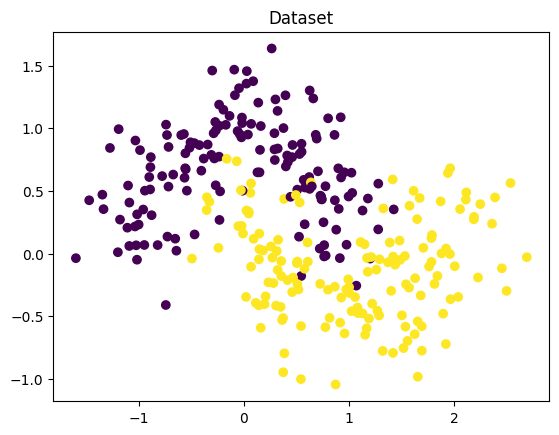

In [14]:
#Create 2D datasets
X,Y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Dataset")
plt.show()

#train-tst split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0
)

#Scaling 
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform (X_test)

In [15]:
# Logistic Regression
#Part B: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression")
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_lr))

Logistic Regression
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[34  5]
 [ 7 44]]


In [16]:
#Decision Tree
#Part C : Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [17]:
#KNN 
#Part D: KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
Y_pred_knn= knn.predict(X_test_scaled)
print("KNN")
print("Accuracy:",accuracy_score(Y_test, Y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))

KNN
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[39  0]
 [ 6 45]]


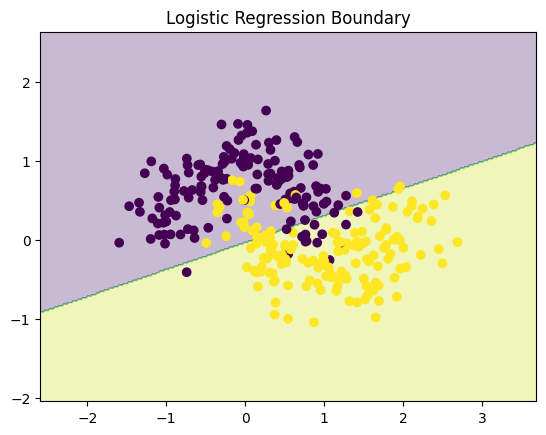

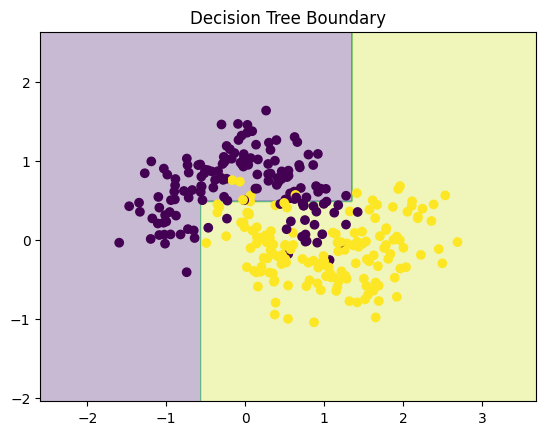

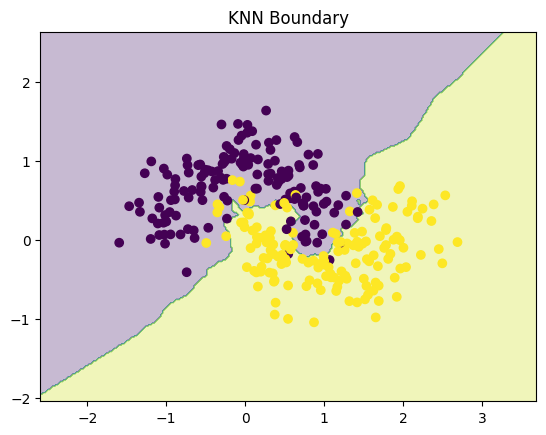

In [21]:
#Plotting boundry
#Part E: Visualization
def plot_boundary(model, scaled, title):
    h=0.02
    X_min, X_max = X[:,0].min()-1, X[:, 0].max()+1
    Y_min, Y_max = X[:,1].min()-1, X[:, 1].max()+1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
    grid = np.c_[XX.ravel(), YY.ravel()]
    if scaled:
        grid= scaler.transform(grid)
        
    Z= model.predict(grid)
    Z= Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.title(title)
    plt.show()
    
plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(knn, True, "KNN Boundary")
